<a href="https://colab.research.google.com/github/AbdouIM2AG/mon-cv/blob/main/programmation%20NEURONE%20ARTIFICIEL%20(DEEP%20LEARNING).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [36]:
from sklearn.metrics import accuracy_score

dimension de X: (100, 2)
dimension de y: (100, 1)


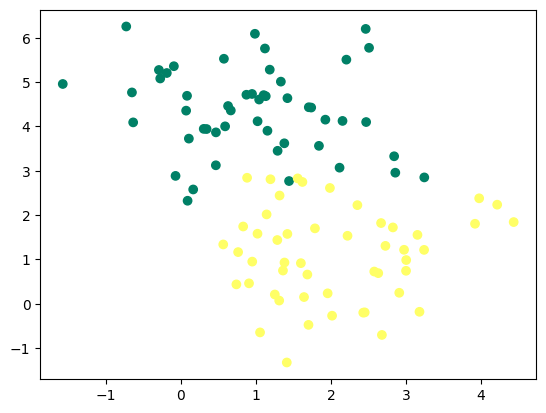

In [8]:
X, y= make_blobs(n_samples=100, n_features=2,centers=2, random_state=0)
y=y.reshape((y.shape[0],1))

print('dimension de X:',X.shape)
print('dimension de y:',y.shape)
plt.scatter(X[:,0],X[:,1],c=y, cmap='summer')
plt.show()

In [18]:
def initialisation(X):
  w = np.random.randn(X.shape[1],1)
  b = np.random.randn(1)
  return w,b


In [19]:
def model(X,w,b):
  Z=X.dot(w)+b
  A= 1 / (1 + np.exp(-Z))
  return A



In [17]:
def log_loss(A, y):
  return 1 /len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))

In [22]:
def gradients(A, X, y):
  dw = 1 / len(y) * np.dot(X.T, (A - y))
  db = 1 / len(y) * np.sum(A - y)
  return dw, db

In [23]:
def update(w, b, dw, db, alpha):
  w = w - alpha * dw
  b = b - alpha * db
  return w, b

In [53]:
def predict(X, w, b):
  A = model(X, w, b)
  print(A)
  return A>=0.5

In [46]:
def artificial_neuron(X, y, alpha=0.1, n_iter=100):
  w, b = initialisation(X)
  Loss=[]

  for i in range(n_iter):
    A = model(X, w, b)
    Loss.append(log_loss(A, y))
    dw,db = gradients(A,X,y)
    w,b = update(w,b,dw,db,alpha)
  y_pred=predict(X,w,b)
  print(accuracy_score(y,y_pred))

  plt.plot(Loss)
  plt.show()
  return w,b

[[0.96378577]
 [0.69738798]
 [0.00768553]
 [0.13216519]
 [0.95331388]
 [0.3488159 ]
 [0.08485404]
 [0.94550905]
 [0.05702871]
 [0.81594468]
 [0.04001707]
 [0.83349073]
 [0.03748842]
 [0.02252872]
 [0.68559544]
 [0.9803832 ]
 [0.98554309]
 [0.04294956]
 [0.6568805 ]
 [0.59950359]
 [0.05939728]
 [0.04560799]
 [0.38229866]
 [0.00764548]
 [0.93379615]
 [0.04270935]
 [0.84380606]
 [0.0143293 ]
 [0.08580507]
 [0.73024492]
 [0.96499908]
 [0.05723406]
 [0.60791178]
 [0.9656113 ]
 [0.40465858]
 [0.27078523]
 [0.72836888]
 [0.54736778]
 [0.48209463]
 [0.40308575]
 [0.06952181]
 [0.11228584]
 [0.00150913]
 [0.18497326]
 [0.20089864]
 [0.81275555]
 [0.94625328]
 [0.93527473]
 [0.00645469]
 [0.01443834]
 [0.9115444 ]
 [0.50238949]
 [0.07491294]
 [0.05648627]
 [0.82062254]
 [0.05632619]
 [0.72052998]
 [0.78052949]
 [0.93620205]
 [0.98343712]
 [0.60886823]
 [0.21446092]
 [0.00746009]
 [0.90878408]
 [0.0226965 ]
 [0.36886788]
 [0.04121897]
 [0.64293795]
 [0.93069962]
 [0.29696152]
 [0.19191592]
 [0.88

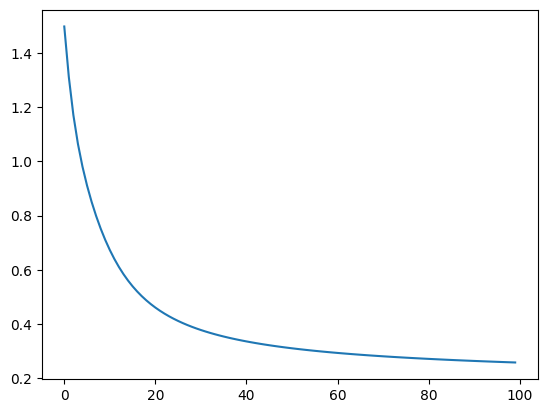

In [58]:
w,b=artificial_neuron(X , y)

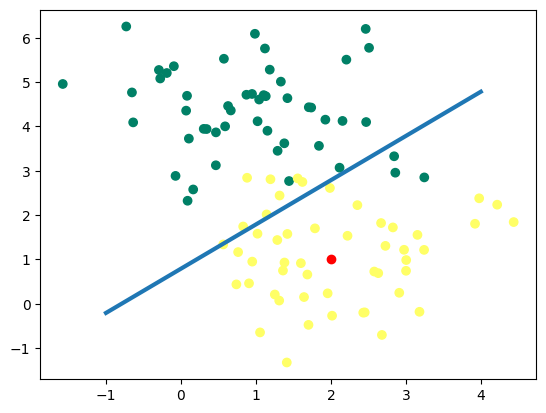

[0.86058618]


array([ True])

In [57]:
new_plant = np.array([2,1])
x0=np.linspace(-1,4,100)
x1=-(w[0]*x0+b)/w[1]
plt.plot(x0,x1,lw=3)


plt.scatter(X[:,0],X[:,1],c=y, cmap='summer')
plt.scatter(new_plant[0],new_plant[1],color='red')
plt.show()
predict(new_plant,w,b)